## Лабораторна робота **No. 1.2** студентки **Іванченко О. В.**

Тема: Лінійна регресія з викриистанням реальних даних.

---
###Завдання 1: Вибір варіанту завдання.
  * Оберіть один з 10 варіантів завдань відповідно до свого номеру в групі або за вказівкою викладача.
  * Ознайомтеся з описом набору даних та способом його отримання.

          Варіант 5: Bike Sharing Dataset
          
          Опис: Прогнозування кількості орендованих велосипедів на основі погодних умов та інших факторів.
          Джерело даних: UCI Bike Sharing Dataset
          Отримання та використання даних:
          1. Завантажити файл даних з https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
          2. Розпакувати архів та використати файл day.csv
          3. Використати pandas для завантаження даних:

          import pandas as pd
          # Після завантаження та розпакування архіву
          df = pd.read_csv('day.csv')
          # Виберіть числові features (X) та цільову змінну (y)
          X = df[['temp', 'atemp', 'hum', 'windspeed']].values
          y = df['cnt'].values

---
###Завдання 2. Завантаження та підготовка даних
- Завантажте набір даних згідно з інструкціями для вашого варіанту
- Здійсніть попередній аналіз даних (розмір вибірки, кількість ознак, типи даних)
- Обробіть пропущені значення та проведіть нормалізацію даних

In [1]:
# Імпорти

import os
import urllib.request
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
# Завантаження набору даних та розпаковка архіву

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
zip_filename = "Bike-Sharing-Dataset.zip"
extracted_dir = "Bike-Sharing-Dataset"

# Завантаження, якщо архів не існує
if not os.path.exists(zip_filename):
    print("Завантаження архіву...")
    urllib.request.urlretrieve(url, zip_filename)
    print("Архів завантажено.")
else:
    print("Архів уже існує, завантаження пропущено.")

# Розпакування, якщо ще не розпаковано
if not os.path.exists(extracted_dir):
    print("Розпакування архіву...")
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall(extracted_dir)
    print("Розпакування завершено.")
else:
    print("Архів уже розпаковано, операція пропущена.")

Архів уже існує, завантаження пропущено.
Архів уже розпаковано, операція пропущена.


In [3]:
# Функція для завантаження даних

def load_variant_data(extracted_dir):
  df = pd.read_csv(extracted_dir+'/day.csv')
  X = df[['temp', 'atemp', 'hum', 'windspeed']].values
  y = df['cnt'].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test


In [4]:
# Завантаження даних

X_train, X_test, y_train, y_test = load_variant_data(extracted_dir)

In [5]:
# Перевірка успішного завантаження даних

if X_train is None:
    # Якщо дані вимагають ручного завантаження, виходимо
    import sys
    sys.exit()

In [6]:
# Нормалізація даних

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

In [7]:
# Параметри для градієнтного спуску

w_init = np.zeros(X_train.shape[1])  # параметр w для кожної ознаки
b_init = 0  # початкове значення b
alpha = 0.01  # швидкість навчання
iterations = 350  # кількість ітерацій

In [8]:
# Розмір навчальної вибірки
m = X_train.shape[0]
n = X_train.shape[1]  # кількість ознак

print(f"Розмір тренувальних даних: {X_train.shape}")
print(f"Кількість прикладів (m): {m}")
print(f"Кількість ознак (n): {n}")
print(f"Тип даних Х_train: {X_train.dtype}")  # тип даних у X
print(f"Тип даниї y_train: {y_train.dtype}")  # тип даних у y

Розмір тренувальних даних: (584, 4)
Кількість прикладів (m): 584
Кількість ознак (n): 4
Тип даних Х_train: float64
Тип даниї y_train: int64


---
###Завдання     3. Розділення даних на тренувальну та тестову вибірки
- Використовуйте метод train_test_split для розділення даних
- Рекомендоване співвідношення: 80% для тренування, 20% для тестування

In [9]:
# Виконано раніше

---
###Завдання     4. Реалізація функцій лінійної регресії
- Реалізуйте функцію обчислення вихідних значень моделі compute_model_output
- Реалізуйте функцію обчислення вартості compute_cost
- Реалізуйте функцію обчислення градієнту compute_gradient
- Реалізуйте функцію градієнтного спуску gradient_descent

In [10]:
# Функція обчислення моделі

def compute_model_output(X, w, b):
    """
    Обчислює прогноз лінійної моделі

    Аргументи:
      X (ndarray (m,n)): Дані, m прикладів з n ознаками
      w (ndarray (n,)): параметри моделі
      b (скаляр): параметр моделі

    Повертає:
      f_wb (ndarray (m,)): прогнозовані значення
    """
    m = X.shape[0]
    f_wb = np.zeros(m)

    for i in range(m):
        f_wb[i] = np.dot(X[i], w) + b

    return f_wb

In [11]:
# Функція обчислення вартості

def compute_cost(X, y, w, b):
    """
    Обчислює функцію вартості для лінійної регресії

    Аргументи:
      X (ndarray (m,n)): Дані, m прикладів з n ознаками
      y (ndarray (m,)): цільові значення
      w (ndarray (n,)): параметри моделі
      b (скаляр): параметр моделі

    Повертає:
      total_cost (float): вартість використання w,b як параметрів для лінійної регресії
    """
    m = X.shape[0]

    cost_sum = 0
    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum

    return total_cost

In [12]:
# Функція обчислення градієнта

def compute_gradient(X, y, w, b):
    """
    Обчислює градієнт для лінійної регресії

    Аргументи:
      X (ndarray (m,n)): Дані, m прикладів з n ознаками
      y (ndarray (m,)): цільові значення
      w (ndarray (n,)): параметри моделі
      b (скаляр): параметр моделі

    Повертає:
      dj_dw (ndarray (n,)): Градієнт функції вартості відносно параметрів w
      dj_db (скаляр): Градієнт функції вартості відносно параметра b
    """
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db


In [13]:
# Функція градієнтного спуску

def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    Виконує градієнтний спуск для пошуку w,b

    Аргументи:
      X (ndarray (m,n)): Дані, m прикладів з n ознаками
      y (ndarray (m,)): цільові значення
      w_in (ndarray (n,)): початкові значення параметрів моделі
      b_in (скаляр): початкове значення параметра моделі
      alpha (float): швидкість навчання
      num_iters (int): кількість ітерацій градієнтного спуску

    Повертає:
      w (ndarray (n,)): Оновлені значення параметрів w після градієнтного спуску
      b (скаляр): Оновлене значення параметра b після градієнтного спуску
      J_history (List): Історія значень функції вартості
      p_history (list): Історія параметрів [w,b]
    """

    # Масив для збереження значень вартості J та параметрів w, b
    J_history = []
    p_history = []
    w = w_in.copy()  # уникаємо зміни глобальних значень параметрів
    b = b_in

    for i in range(num_iters):
        # Обчислення градієнту
        dj_dw, dj_db = compute_gradient(X, y, w, b)

        # Оновлення параметрів
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Збереження історії
        if i < 100000:  # запобігає вичерпанню ресурсів
            J_history.append(compute_cost(X, y, w, b))
            p_history.append([w.copy(), b])

        # Вивід проміжних результатів
        if i % (num_iters // 10) == 0 or i == num_iters - 1:
            print(f"Ітерація {i:4}: Вартість {J_history[-1]:0.2e}, ",
                  f"w[0]: {w[0]: 0.3e}, b: {b: 0.5e}")

    return w, b, J_history, p_history

---
###Завдання     5. Навчання моделі
- Ініціалізуйте початкові значення параметрів
- Виконайте алгоритм градієнтного спуску для знаходження оптимальних параметрів
- Відстежуйте зміну функції вартості під час навчання

In [14]:
# Запуск градієнтного спуску на нормалізованих даних
w_final, b_final, J_hist, p_hist = gradient_descent(X_train_norm, y_train, w_init, b_init, alpha, iterations)
print(f"Знайдені параметри (w,b): w={w_final}, b={b_final:8.4f}")

Ітерація    0: Вартість 1.20e+07,  w[0]:  1.193e+01, b:  4.56098e+01
Ітерація   35: Вартість 6.28e+06,  w[0]:  3.071e+02, b:  1.38465e+03
Ітерація   70: Вартість 3.58e+06,  w[0]:  4.523e+02, b:  2.32660e+03
Ітерація  105: Вартість 2.28e+06,  w[0]:  5.244e+02, b:  2.98921e+03
Ітерація  140: Вартість 1.63e+06,  w[0]:  5.605e+02, b:  3.45532e+03
Ітерація  175: Вартість 1.32e+06,  w[0]:  5.788e+02, b:  3.78321e+03
Ітерація  210: Вартість 1.16e+06,  w[0]:  5.882e+02, b:  4.01386e+03
Ітерація  245: Вартість 1.08e+06,  w[0]:  5.930e+02, b:  4.17611e+03
Ітерація  280: Вартість 1.05e+06,  w[0]:  5.953e+02, b:  4.29024e+03
Ітерація  315: Вартість 1.03e+06,  w[0]:  5.965e+02, b:  4.37053e+03
Ітерація  349: Вартість 1.02e+06,  w[0]:  5.969e+02, b:  4.42565e+03
Знайдені параметри (w,b): w=[ 596.89623949  606.79268925 -402.12288497 -283.73185132], b=4425.6534


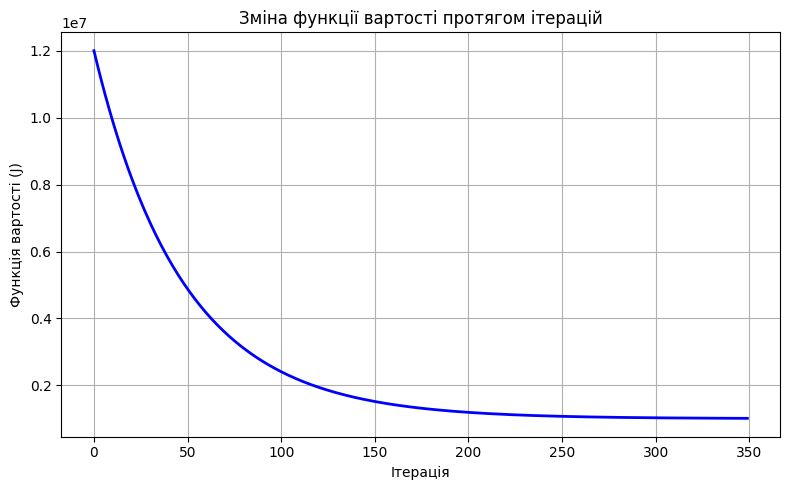

In [15]:

# Побудова графіка вартості
plt.figure(figsize=(8, 5))
plt.plot(J_hist, color='blue', linewidth=2)
plt.title('Зміна функції вартості протягом ітерацій')
plt.xlabel('Ітерація')
plt.ylabel('Функція вартості (J)')
plt.grid(True)
plt.tight_layout()
plt.show()

---
###Завдання 6. Оцінка якості моделі
- Обчисліть метрики якості моделі (R², MSE, MAE) на тренувальній вибірці
- Проведіть оцінку моделі на тестовій вибірці
- Проаналізуйте важливість ознак (feature importance)

In [16]:
# Використання моделі для прогнозування

def predict(X, w, b):
    """
    Прогнозування за допомогою лінійної моделі

    Аргументи:
      X (ndarray (m,n)): Дані, m прикладів з n ознаками
      w (ndarray (n,)): параметри моделі
      b (скаляр): параметр моделі

    Повертає:
      y_pred (ndarray (m,)): прогнозовані значення
    """
    return np.dot(X, w) + b

# Обчислення прогнозів для тренувальних даних
y_pred_train = predict(X_train_norm, w_final, b_final)

In [17]:
# Додатковий аналіз - коефіцієнт детермінації R²

def r_squared(y_true, y_pred):
    """
    Обчислює коефіцієнт детермінації R²

    Аргументи:
      y_true (ndarray): фактичні значення
      y_pred (ndarray): прогнозовані значення

    Повертає:
      r2 (скаляр): коефіцієнт детермінації
    """
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

In [18]:
# Обчислення R²

r2 = r_squared(y_train, y_pred_train)
print(f"\nКоефіцієнт детермінації (R²): {r2:.4f}")


Коефіцієнт детермінації (R²): 0.4449


In [19]:
# Додатковий аналіз - середньоквадратична помилка

mse = np.mean((y_train - y_pred_train)**2)
print(f"Середньоквадратична помилка (MSE): {mse:.4f}")

Середньоквадратична помилка (MSE): 2034650.6841


In [20]:
# Додатковий аналіз - середня абсолютна помилка

mae = np.mean(np.abs(y_train - y_pred_train))
print(f"Середня абсолютна помилка (MAE): {mae:.4f}")

Середня абсолютна помилка (MAE): 1157.9300


In [21]:
# Оцінка моделі на тестовій виборці

y_pred_test = predict(X_test, w_final, b_final)
r2 = r_squared(y_test, y_pred_test)
mse = np.mean((y_test - y_pred_test)**2)
mae = np.mean(np.abs(y_test - y_pred_test))

print(f"Коефіцієнт детермінації (R²): {r2:.4f}")
print(f"Середньоквадратична помилка (MSE): {mse:.4f}")
print(f"Середня абсолютна помилка (MAE): {mae:.4f}")

Коефіцієнт детермінації (R²): 0.0969
Середньоквадратична помилка (MSE): 3621356.1910
Середня абсолютна помилка (MAE): 1622.0126


---
###Завдання     7. Аналіз та візуалізація результатів
- Візуалізуйте дані та отриману модель
- Проаналізуйте процес навчання (зміну функції вартості)
- Створіть графік прогнозів моделі порівняно зі справжніми значеннями

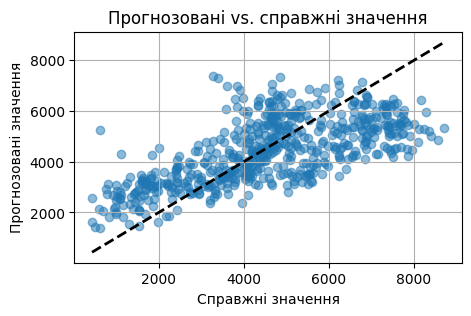

In [22]:
# Візуалізація прогнозів vs. справжніх значень
plt.figure(figsize=(5, 3))
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Прогнозовані vs. справжні значення')
plt.grid(True)
plt.show()

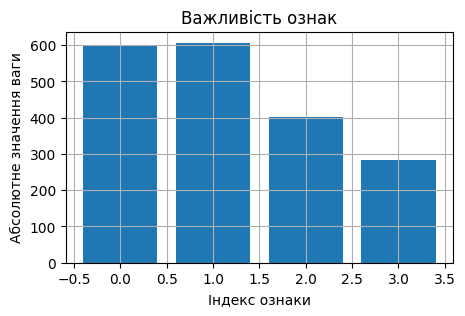

In [23]:
# Візуалізація важливості ознак
if n <= 10:  # Відображаємо тільки якщо кількість ознак не надто велика
    feature_importance = abs(w_final)
    plt.figure(figsize=(5, 3))
    plt.bar(range(n), feature_importance)
    plt.xlabel('Індекс ознаки')
    plt.ylabel('Абсолютне значення ваги')
    plt.title('Важливість ознак')
    plt.grid(True)
    plt.show()

---
###Завдання     8. Експериментування з гіперпараметрами
- Змініть значення швидкості навчання (alpha) та кількості ітерацій
- Дослідіть вплив різних підходів до нормалізації даних
- Порівняйте результати з різними наборами ознак

In [24]:
alphas = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
iterations_list = [501, 1001, 2501, 5001]
l = "-- --"
# Функція градієнтного спуску
def gradient_descent2(X, y, w_in, b_in, alpha, num_iters):

    # Масив для збереження значень вартості J та параметрів w, b
    J_history = []
    p_history = []
    w = w_in.copy()  # уникаємо зміни глобальних значень параметрів
    b = b_in

    for i in range(num_iters):
        # Обчислення градієнту
        dj_dw, dj_db = compute_gradient(X, y, w, b)

        # Оновлення параметрів
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Збереження історії
        if i < 100000:  # запобігає вичерпанню ресурсів
            J_history.append(compute_cost(X, y, w, b))
            p_history.append([w.copy(), b])

    return w, b, J_history, p_history

for alpha in alphas:

  print("-------------------------- START --------------------------")
  print(f'\n#### Швидкість навчання: {alpha} #####\n')

  for iterations in iterations_list:
    print(f'Кількість ітерацій: {iterations}')
    w_final, b_final, J_hist, p_hist = gradient_descent2(X_train_norm, y_train, w_init, b_init, alpha, iterations)
    print(f"{l} Знайдені параметри (w,b): \n-- -- w = {w_final}, \n-- -- b = {b_final:8.4f}\n")

  print("--------------------------- END ---------------------------")

-------------------------- START --------------------------

#### Швидкість навчання: 1 #####

Кількість ітерацій: 501
-- -- Знайдені параметри (w,b): 
-- -- w = [ 6.74085082e+23  6.78945371e+23  2.21951059e+23 -2.63036902e+23], 
-- -- b = 833409673.3412

Кількість ітерацій: 1001
-- -- Знайдені параметри (w,b): 
-- -- w = [ 7.90356527e+44  7.96055157e+44  2.60234907e+44 -3.08407556e+44], 
-- -- b = 1045196060488884148749522173952.0000

Кількість ітерацій: 2501
-- -- Знайдені параметри (w,b): 
-- -- w = [ 1.27393723e+108  1.28312257e+108  4.19459984e+107 -4.97107133e+107], 
-- -- b = 1653194015235125608376938364160075181647811436829676038031427640959368487827440876920659509248.0000

Кількість ітерацій: 5001


<ipython-input-11-3e5d1fbaea78>:22: RuntimeWarning: overflow encountered in scalar add
  cost_sum = cost_sum + cost
<ipython-input-11-3e5d1fbaea78>:21: RuntimeWarning: overflow encountered in scalar power
  cost = (f_wb - y[i]) ** 2


-- -- Знайдені параметри (w,b): 
-- -- w = [ 2.82286216e+213  2.84321556e+213  9.29463153e+212 -1.10151810e+213], 
-- -- b = 3819095661233484754202176156841568242476569771707107922276065346381619075903380491028030103203937910124930582811317791104114868506125805787560329071969801358118380936240657470151593038164744166440960.0000

--------------------------- END ---------------------------
-------------------------- START --------------------------

#### Швидкість навчання: 0.1 #####

Кількість ітерацій: 501
-- -- Знайдені параметри (w,b): 
-- -- w = [ 553.50360512  652.62169225 -430.70286018 -302.55269169], 
-- -- b = 4560.9777

Кількість ітерацій: 1001
-- -- Знайдені параметри (w,b): 
-- -- w = [ 523.16237966  683.13856355 -430.91389845 -301.71676   ], 
-- -- b = 4560.9777

Кількість ітерацій: 2501
-- -- Знайдені параметри (w,b): 
-- -- w = [ 484.68417802  721.83951611 -431.18153343 -300.65664632], 
-- -- b = 4560.9777

Кількість ітерацій: 5001
-- -- Знайдені параметри (w,b): 
-- -- w 

In [27]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import numpy as np

def metrics(y_true, y_pred):
    r2 = r_squared(y_true, y_pred)
    print(f"\nКоефіцієнт детермінації (R²): {r2:.4f}")

    mse = np.mean((y_true - y_pred) ** 2)
    print(f"Середньоквадратична помилка (MSE): {mse:.4f}")

    mae = np.mean(np.abs(y_true - y_pred))
    print(f"Середня абсолютна помилка (MAE): {mae:.4f}")

# Параметри градієнтного спуску
b_init = 0
alpha = 0.01
iterations = 350


for scaler in [MinMaxScaler(), RobustScaler(), StandardScaler()]:
    print(f"\n\n=== Використовується скейлер: {scaler.__class__.__name__} ===")

    # Розділення та нормалізація
    X_train, X_test, y_train, y_test = load_variant_data(extracted_dir)
    X_train_norm = scaler.fit_transform(X_train)
    X_test_norm = scaler.transform(X_test)

    # Ініціалізація w
    w_init = np.zeros(X_train.shape[1])

    # Градієнтний спуск
    w_final, b_final, J_hist, p_hist = gradient_descent(X_train_norm, y_train, w_init, b_init, alpha, iterations)

    print(f"Знайдені параметри (w,b): \nw={w_final}, \nb={b_final:8.4f}")

    # Прогноз на тренувальних даних
    y_pred_train = predict(X_train_norm, w_final, b_final)

    # Метрики
    metrics(y_train, y_pred_train)



=== Використовується скейлер: MinMaxScaler ===
Ітерація    0: Вартість 1.18e+07,  w[0]:  2.776e+01, b:  4.56098e+01
Ітерація   35: Вартість 3.63e+06,  w[0]:  7.090e+02, b:  1.13814e+03
Ітерація   70: Вартість 1.90e+06,  w[0]:  1.045e+03, b:  1.63246e+03
Ітерація  105: Вартість 1.52e+06,  w[0]:  1.222e+03, b:  1.85247e+03
Ітерація  140: Вартість 1.43e+06,  w[0]:  1.325e+03, b:  1.94687e+03
Ітерація  175: Вартість 1.40e+06,  w[0]:  1.393e+03, b:  1.98390e+03
Ітерація  210: Вартість 1.39e+06,  w[0]:  1.446e+03, b:  1.99492e+03
Ітерація  245: Вартість 1.37e+06,  w[0]:  1.490e+03, b:  1.99427e+03
Ітерація  280: Вартість 1.36e+06,  w[0]:  1.530e+03, b:  1.98857e+03
Ітерація  315: Вартість 1.35e+06,  w[0]:  1.568e+03, b:  1.98082e+03
Ітерація  349: Вартість 1.34e+06,  w[0]:  1.603e+03, b:  1.97265e+03
Знайдені параметри (w,b): 
w=[1602.58007619 1525.73780947 1088.52079776  543.08110568], 
b=1972.6531

Коефіцієнт детермінації (R²): 0.2707
Середньоквадратична помилка (MSE): 2673406.2588
Серед

In [29]:
# Можливі підмножини ознак
feature_sets = {
    "усі 4": ['temp', 'atemp', 'hum', 'windspeed'],
    "temp, hum": ['temp', 'hum'],
    "temp, atemp, hum": ['temp', 'atemp', 'hum'],
    "atemp, windspeed": ['atemp', 'windspeed']
}

# Параметри градієнтного спуску
alpha = 0.01
iterations = 350
b_init = 0

df = pd.read_csv(extracted_dir+'/day.csv')

for name, features in feature_sets.items():
    print(f"\n\n=== Набір ознак: {name} ===")

    # Формування підмножини ознак
    X = df[features].values
    y = df['cnt'].values

    # Розділення
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Нормалізація (наприклад, StandardScaler)
    scaler = StandardScaler()
    X_train_norm = scaler.fit_transform(X_train)
    X_test_norm = scaler.transform(X_test)

    # ініціалізація w
    w_init = np.zeros(X_train_norm.shape[1])

    # Навчання
    w_final, b_final, J_hist, p_hist = gradient_descent(X_train_norm, y_train, w_init, b_init, alpha, iterations)

    # Прогноз
    y_pred_train = predict(X_train_norm, w_final, b_final)

    # Метрики
    print(f"Знайдені параметри (w,b): \nw={w_final}, \nb={b_final:8.4f}")
    metrics(y_train, y_pred_train)




=== Набір ознак: усі 4 ===
Ітерація    0: Вартість 1.21e+07,  w[0]:  1.237e+01, b:  4.57113e+01
Ітерація   35: Вартість 6.34e+06,  w[0]:  3.185e+02, b:  1.38774e+03
Ітерація   70: Вартість 3.62e+06,  w[0]:  4.693e+02, b:  2.33178e+03
Ітерація  105: Вартість 2.30e+06,  w[0]:  5.446e+02, b:  2.99587e+03
Ітерація  140: Вартість 1.65e+06,  w[0]:  5.828e+02, b:  3.46302e+03
Ітерація  175: Вартість 1.33e+06,  w[0]:  6.025e+02, b:  3.79163e+03
Ітерація  210: Вартість 1.17e+06,  w[0]:  6.129e+02, b:  4.02279e+03
Ітерація  245: Вартість 1.10e+06,  w[0]:  6.185e+02, b:  4.18541e+03
Ітерація  280: Вартість 1.06e+06,  w[0]:  6.216e+02, b:  4.29979e+03
Ітерація  315: Вартість 1.04e+06,  w[0]:  6.234e+02, b:  4.38026e+03
Ітерація  349: Вартість 1.03e+06,  w[0]:  6.244e+02, b:  4.43551e+03
Знайдені параметри (w,b): 
w=[ 624.38884756  623.6050831  -455.83696463 -303.10807676], 
b=4435.5092

Коефіцієнт детермінації (R²): 0.4648
Середньоквадратична помилка (MSE): 2055335.8225
Середня абсолютна помилка